In [1]:
import requests

In [2]:
import pandas as pd

In [73]:
import dhlab.token_map as tm

In [75]:
import dhlab.nb_external_files as nbe

BASE_URL = "https://api.nb.no/ngram/db2"
BASE_URL1 = "https://api.nb.no/ngram/db1"

In [3]:
BASE_URL = "https://api.nb.no/dhlab"
BASE_URL1 = "https://api.nb.no/dhlab"

In [4]:
def get_metadata(urns = None):
    params = locals()
    r = requests.post(f"{BASE_URL}/get_metadata", json = params)
    return r.json()

In [70]:
def get_word_frequencies(urns = None, cutoff = 0, words = None):
    params = locals()
    r = requests.post(BASE_URL1 + "/frequencies", json = params)
    result = r.json()
    structure = {u[0][0] : dict([(x[1],x[2]/x[3]) for x in u]) for u in result if u != []}
    #res = (df, tot)

    return structure

In [72]:
get_word_frequencies(urns = list(urns), words = [',','.'])

{'URN:NBN:no-nb_digibok_2016040608138': {',': 0.07405230678812812,
  '.': 0.0641198942109903},
 'URN:NBN:no-nb_digibok_2016032908022': {',': 0.05441722174845,
  '.': 0.10254223615368659},
 'URN:NBN:no-nb_digibok_2016041248042': {',': 0.058394657944944126,
  '.': 0.05675933496865631},
 'URN:NBN:no-nb_digibok_2016040108053': {',': 0.05234231876472128,
  '.': 0.051295472389426854},
 'URN:NBN:no-nb_digibok_2016061308132': {',': 0.04890391078521234,
  '.': 0.04162847540482738},
 'URN:NBN:no-nb_digibok_2016062148029': {',': 0.060307722752683916,
  '.': 0.043932122891208625},
 'URN:NBN:no-nb_digibok_2016030248187': {',': 0.05348557692307692,
  '.': 0.0546875},
 'URN:NBN:no-nb_digibok_2016052608119': {',': 0.07367633466836847,
  '.': 0.06635564749204113},
 'URN:NBN:no-nb_digibok_2016041448086': {',': 0.004965973882655877,
  '.': 0.004782048924038992},
 'URN:NBN:no-nb_digibok_2009012800100': {',': 0.02505643340857788,
  '.': 0.07325056433408578},
 'URN:NBN:no-nb_digibok_2016011948065': {',': 0.

In [18]:
urns = list(document_corpus(doctype = 'digibok', from_year = 1920, to_year = 1930, limit = 300).urn)

In [19]:
print(len(urns))

300


In [64]:
x[1]

{'URN:NBN:no-nb_digibok_2012052908155': 272,
 'URN:NBN:no-nb_digibok_2021032548798': 22543}

In [60]:
pd.DataFrame(get_metadata(urns = urns[:10]))

,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
0,URN:NBN:no-nb_digibok_2014101506007,Flukten til Island,"Engelstad , Arne",oai:nb.bibsys.no:999523623094702202,a98620ec3a5304fa1bf51841bc9a7876,,Oslo,19250101,1925,Grøndahl,nob,,,novel,Skjønnlitteratur,digibok
1,URN:NBN:no-nb_digibok_2016012548121,Udvalgte romancer og sange,"Kjerulf , Halfdan",oai:nb.bibsys.no:991507527254702202,21b975750ac682c0d735af8cbe6a5d55,,Leipzig,19280101,1928,Brandstetter,nob,sanger / romanser,783.242,,Uklassifisert,digibok
2,URN:NBN:no-nb_digibok_2010110806068,Odysseen,"Homerus / Østbye , P. (Peter)",oai:nb.bibsys.no:990309816704702202,25d8aad9c5028a65b7edf1ec2a2a2f80,,Kristiania,19220101,1922,Gyldendal,nob,,,,Uklassifisert,digibok
3,URN:NBN:no-nb_digibok_2008040300060,Salmonsens Konversationsleksikon. B. 9 : Friel...,"Blangstrup , Chr.",oai:nb.bibsys.no:999203609714702202,a75aa349bc931759f0b29eb53440b7f8,,København,19200101,1920,Schultz,dan,Leksika / generelle / skrifter / konversasjons...,038.81,,Uklassifisert,digibok
4,URN:NBN:no-nb_digibok_2006082400067,Gjennem Kaukasus til Volga,"Nansen , Fridtjof",oai:nb.bibsys.no:999603051654702202,c1447c5a04d3aaa1cf365f63e248da07,,,19290101,1929,Dybwad,nob,Reiseskildringer / Reiseskildringer,,,Uklassifisert,digibok
5,URN:NBN:no-nb_digibok_2013070408051,Ditlev Ahlefeldts Erindringer : 1617-1660,"Ahlefeldt , Ditlev",oai:nb.bibsys.no:999423089644702202,c61b48963e6415a994acc1bc58f2b5bb,,København,19220101,1922,Koppel,dan,,,,Uklassifisert,digibok
6,URN:NBN:no-nb_digibok_2014121708109,Lov om forsikringsavtaler av 6. juni 1930 : me...,"Bugge , Nicolay L.",oai:nb.bibsys.no:998121481854702202,79b8733aaf4e5f623120b79485ebd336,,Oslo,19300101,1930,Aschehoug,nob,forsikringsavtalelover / kommentarer / norge,,,Uklassifisert,digibok
7,URN:NBN:no-nb_digibok_2007121910007,Gesandten : drama i 4 akter,"Aall , Herman Harris",oai:nb.bibsys.no:990504319354702202,15ca33af147a3a63f65d570ba8b10b18,,Stockholm,19200101,1920,Chelius,swe,,,,Uklassifisert,digibok
8,URN:NBN:no-nb_digibok_2017112048044,Die Kristallstruktur der wasserfreien Alaune R...,"Vegard , L. / Maurstad , Alf",oai:nb.bibsys.no:999720241074702202,4d56978f1217f2db418a137777177c0a,,Oslo,19280101,1928,I kommisjon hos Dybwad,ger,,,,Uklassifisert,digibok
9,URN:NBN:no-nb_digibok_2010062106078,Vor gudstjeneste efter den nye alterbok,"Jensen , S. Bretteville (Sigurd)",oai:nb.bibsys.no:999722125664702202,db96b426a7040a6b47aa02d58da15318,,,19200101,1920,Luthersk bokmission,nob,Liturgi / Teologi / alterbøker / norske / kirk...,,,Uklassifisert,digibok


In [8]:
def konk(urns=None, word=None, before=5, after=5, only_urn=True):
    params = locals()
    #print(params)
    r = requests.post("https://api.nb.no/ngram/urnkonk", json = params)
    return r.json()

def meta_natbib(children = False, yearfrom = "", yearto = "", lang = None, author = None, title = None, subtitle = None, publisher = None, subject = None, topic = None, marctuples = None, limit=20):
    params = locals()
    #print(params)
    r = requests.post("https://api.nb.no/ngram/get_urns", json = params)
    return r.json()

def metadata(urns=None, marctuples = [(100,1,' ', 'a'),(260, ' ',' ', 'c'), (245,1,3,'a'),(245,1,0,'a'),(245,1,3,'b'),(245,1,0,'b'), (650,7,' ','a'), (653,' ',' ','a')]):
    params = locals()
    #print(params)
    r = requests.post("https://api.nb.no/ngram/metadata", json=params)
    return r.json()

In [9]:
def document_corpus(doctype = None, author = None, freetext = None, from_year = None, to_year = None, from_timestamp = None, to_timestamp = None, title = None, ddk = None, subject = None, lang = None, limit = None):
    """ Fetch a corpus based on metadata - doctypes are digibok, digavis, digitidsskrift"""
    
    parms = locals()
    params = {x:parms[x] for x in parms if not parms[x] is None }
    if "ddk" in params:
        params["ddk"]  = "^" + params['ddk'].replace('.', '"."')
        
    r=requests.post(BASE_URL + "/build_corpus", json=params)
    
    return pd.DataFrame(r.json())

In [15]:
c = document_corpus(freetext="hamsun")

In [25]:
def frequencies(urns = None, cutoff = 0, words = None):
    params = locals()
    print(params)
    r = requests.post(BASE_URL1 + "/frequencies", json = params)
    result = r.json()
    structure = {u[0][0] : dict([tuple(x[1:]) for x in u]) for u in result if u != []}
    return structure

In [17]:
def find_urns(docids = None):
    params = locals()
    r = requests.post(BASE_URL1 + "/find_urn", json = params)
    return r.json()

In [31]:
def get_reference(corpus = 'digavis', from_year = 1950, to_year = 1955, lang = 'nob', limit = 100000):
    params = locals()
    r = requests.get(BASE_URL + "/reference_corpus", params = params)
    if r.status_code == 200:
        result = r.json()
    else:
        result = []
    return pd.DataFrame(result, columns = ['word', 'freq']).set_index('word')

In [34]:
def get_metadata(urns = None):
    params = locals()
    r = requests.post(BASE_URL1 + "/get_metadata", json = params)
    return pd.DataFrame(r.json())

In [41]:
pd.DataFrame(get_metadata(urns))

,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
0,URN:NBN:no-nb_digibok_2012072508019,Repetisjonsopgaver i regning og rumlære for fo...,"Kirkhusmo , A.",oai:nb.bibsys.no:990412997794702202,702d25d47b4eb0c89df0f55c0fe58726,,Oslo,19270101,1927,Cappelen,nob,,,,Uklassifisert,digibok
1,URN:NBN:no-nb_digibok_2016062048024,De døves forening : 1878-1928 ; et festskrift,"Dahl , Henning",oai:nb.bibsys.no:998420609014702202,c8dca400a9ae71b9afffdd622a4066e4,,Oslo,19280101,1928,[s.n.],nob,,,festschrift,Uklassifisert,digibok
2,URN:NBN:no-nb_digibok_2012100907195,Evas ætling : Oslobilleder fra Haakon V's tid,"Hauge , Yngvar",oai:nb.bibsys.no:999606113984702202,08e6c3dec7f35baa4150a8eeafba9e94,,,19300101,1930,Aschehoug,nob,,,,Uklassifisert,digibok
3,URN:NBN:no-nb_digibok_2015052208180,Norsk guldsmedkunst i middelalderen,"Kielland , Thor B.",oai:nb.bibsys.no:999008498354702202,7149e64e358e75006cd8bb4a4ea0ae52,,,19270101,1927,Steenske forlag,nob,middelalder / norge / gotikk / gullsmedkunst /...,739.22,,Uklassifisert,digibok
4,URN:NBN:no-nb_digibok_2013121908066,Toneys arv,"Stuart , Esmè / Sømme , Jacob / Ebbell , Clara...",oai:nb.bibsys.no:990422420884702202,918a79cd2165c9702bb301638f8dc88e,,Kristiania,19230101,1923,Aschehoug,nob / eng,,,,Uklassifisert,digibok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,URN:NBN:no-nb_digibok_2017022048609,De spør om de valgfrie - ? : et ord til landsf...,"Berggrav , Eivind",oai:nb.bibsys.no:999510372424702202,1af9c758ddeb30db5c9e1775ff9f4335,,Kristiania,19210101,1921,Norli,nob,,,,Uklassifisert,digibok
296,URN:NBN:no-nb_digibok_2013070108082,Stempeldampmaskiner : styringer,"Watzinger , A.",oai:nb.bibsys.no:990510625264702202,817a0f96f359c80d2a7fdae1d2e40ff3,,Trondhjem,19220101,1922,[s.l.],nob,,,,Uklassifisert,digibok
297,URN:NBN:no-nb_digibok_2017040348214,Flødevigens utklekningsanstalt : utklekning og...,"Dannevig , Alf",oai:nb.bibsys.no:999705764124702202,53a62ddb06331046aea1ef077c31656f,,,19220101,1922,,nob,,,,Uklassifisert,digibok
298,URN:NBN:no-nb_digibok_2020111007059,Trekk av beruselsens betydning i rettsmedisine...,"Ødegård , Ørnulv",oai:nb.bibsys.no:999708494864702202,57431a419aac67ae1654d3876c71f740,,Oslo,19280101,1928,,nob,Forensic Medicine / Alcoholic Intoxication,,,Uklassifisert,digibok


In [1]:
import dhlab_v2 as d2

In [57]:
z = d2.Ngram(["abort", "likestilling"])

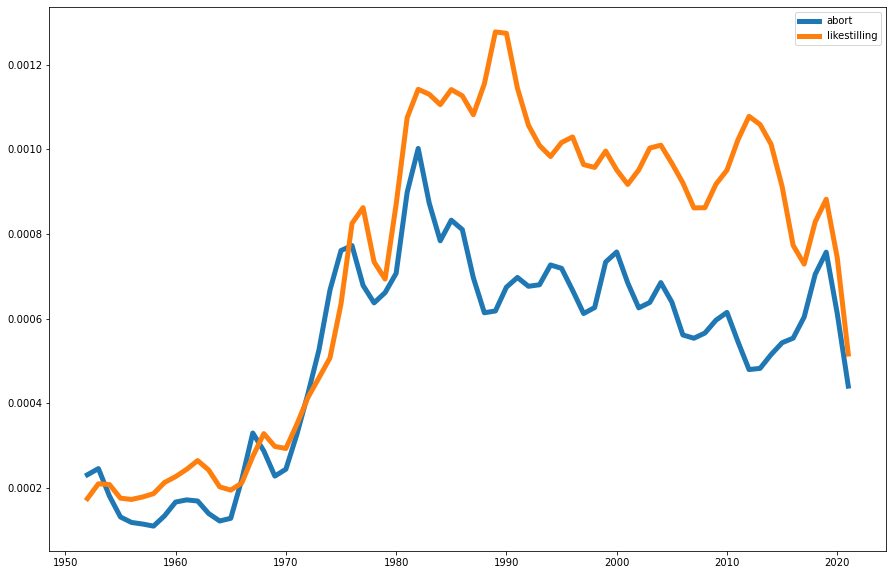

In [60]:
z.plot(lw = 5)

In [73]:
x = d2.Ngram_book("abort likestilling".split())

In [74]:
p = d2.Ngram_book(". , i og på".split())

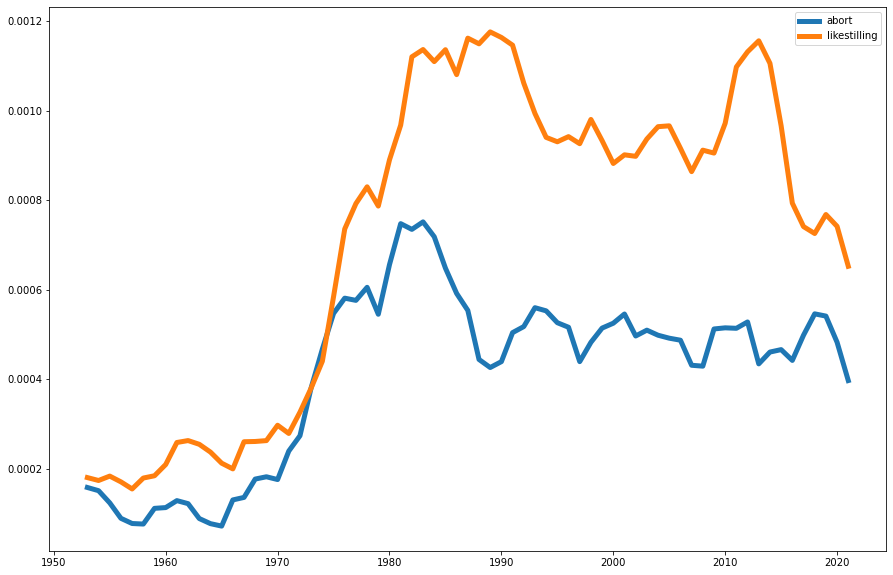

In [75]:
(x.compare(p)*12).rolling(window = 4).mean().plot(lw = 5)

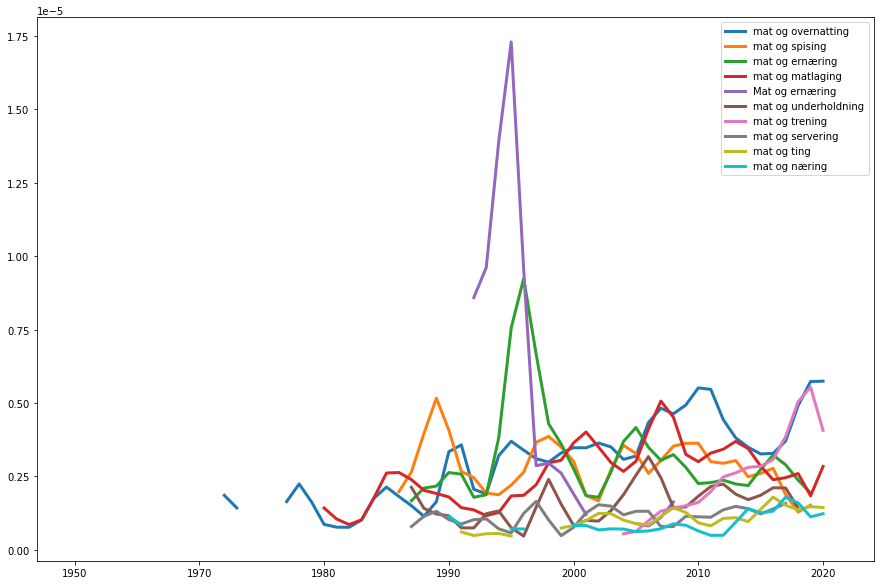

In [53]:
z.plot(lw = 3)

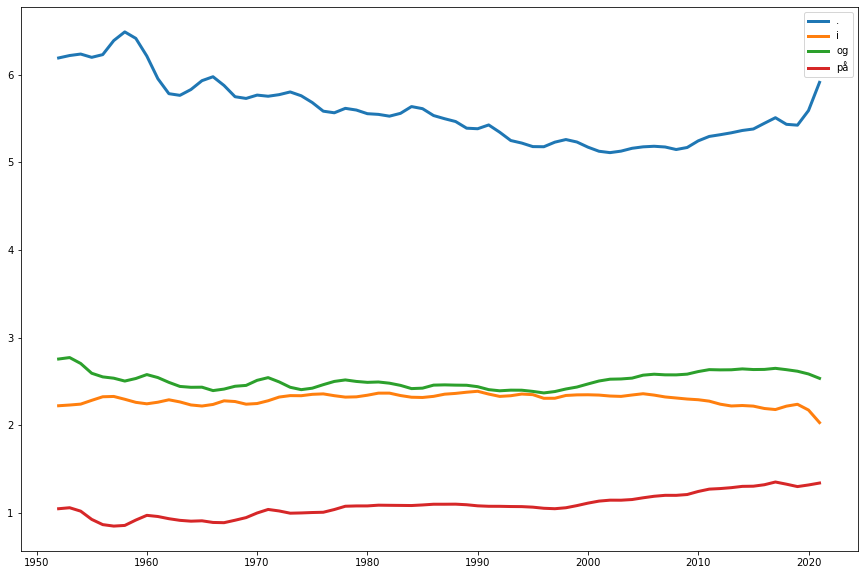

In [54]:
 d2.Ngram(". , i og på".split()).plot(lw = 3)

In [40]:
x = d2.make_word_graph('korona')

In [34]:
import dhlab.graph_networkx_louvain as gnl

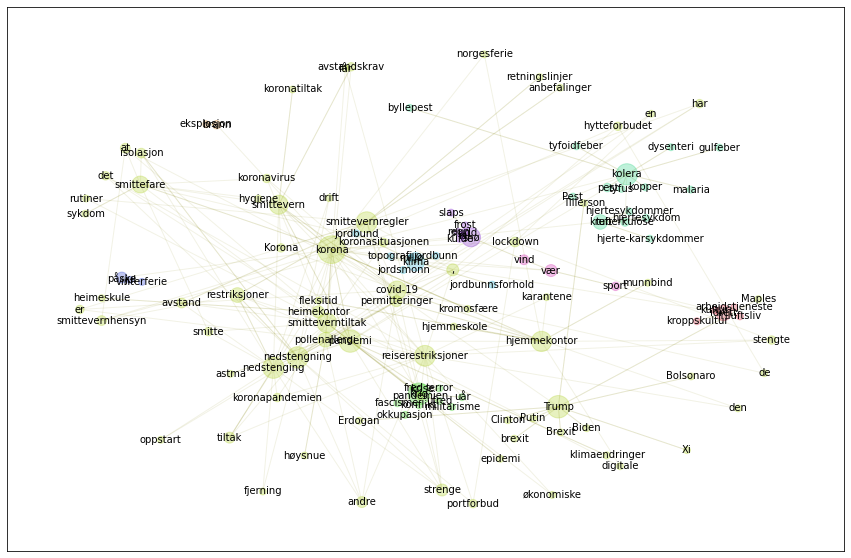

In [41]:
gnl.show_graph(x, spread = 1.2)

In [42]:
gnl.show_communities(x)

korona-Trump :  korona, Trump, pandemi, nedstengning, nedstenging, reiserestriksjoner, smittevernregler, hjemmekontor, smitteverntiltak, smittevern, covid-19, smittefare, restriksjoner, pollenallergi, ,, heimekontor, strenge, tiltak, permitteringer, andre, isolasjon, smittevernhensyn, avstand, at, lockdown, Korona, koronapandemien, har, hytteforbudet, koronavirus, portforbud, koronasituasjonen, stengte, pandemien, er, det, avstandskrav, smitte, rutiner, Putin, Maples, hygiene, norgesferie, en, økonomiske, drift, Biden, Xi, karantene, oppstart, fjerning, anbefalinger, Tillerson, epidemi, koronatiltak, astma, klimaendringer, sykdom, får, kromosfære, de, digitale, den, hjemmeskole, fleksitid, Clinton, Brexit, Erdogan, munnbind, Bolsonaro, brexit, retningslinjer, høysnue, heimeskule

krig-krise :  krig, krise, konflikt, uår, fred, fascisme, okkupasjon, militarisme, terror, ufred

kolera-kreft :  kolera, kreft, tuberkulose, pest, dysenteri, hjerte-karsykdommer, byllepest, hjertesykdom, Pest

In [20]:
import dhlab_v2 as d2

In [21]:
urns = list(d2.document_corpus(from_year = 2000, to_year = 2002, limit = 10).urn)

In [31]:
result = frequencies(urns = urns, cutoff = 100, words = "spise sover skrive .".split())

{'urns': ['URN:NBN:no-nb_digavis_ostlandsposten_null_null_20010317_120_65_1', 'URN:NBN:no-nb_digavis_fremover_null_null_20020205_100_31_1', 'URN:NBN:no-nb_digibok_2017030348111', 'URN:NBN:no-nb_digavis_verdensgang_null_null_20020121_1_20_1', 'URN:NBN:no-nb_digitidsskrift_2018101981128_001', 'URN:NBN:no-nb_digitidsskrift_2020012781428_001', 'URN:NBN:no-nb_digibok_2009020404097', 'URN:NBN:no-nb_digibok_2015112508222', 'URN:NBN:no-nb_digavis_jaerbladet_null_null_20000616_52_67_1', 'URN:NBN:no-nb_digavis_gjengangeren_null_null_20011227_151_299_1'], 'cutoff': 100, 'words': ['spise', 'sover', 'skrive', '.']}


In [32]:
result

{'URN:NBN:no-nb_digitidsskrift_2020012781428_001': {'.': 1280,
  'skrive': 4,
  'sover': 1},
 'URN:NBN:no-nb_digavis_fremover_null_null_20020205_100_31_1': {'.': 2681,
  'spise': 1},
 'URN:NBN:no-nb_digavis_verdensgang_null_null_20020121_1_20_1': {'.': 2994,
  'skrive': 7,
  'sover': 3},
 'URN:NBN:no-nb_digibok_2009020404097': {'.': 1118},
 'URN:NBN:no-nb_digibok_2015112508222': {'.': 2373, 'skrive': 21, 'spise': 2},
 'URN:NBN:no-nb_digibok_2017030348111': {'.': 2},
 'URN:NBN:no-nb_digavis_ostlandsposten_null_null_20010317_120_65_1': {'.': 5015,
  'skrive': 1,
  'sover': 2,
  'spise': 1},
 'URN:NBN:no-nb_digavis_gjengangeren_null_null_20011227_151_299_1': {'.': 1617,
  'sover': 1},
 'URN:NBN:no-nb_digitidsskrift_2018101981128_001': {'.': 2653, 'skrive': 6},
 'URN:NBN:no-nb_digavis_jaerbladet_null_null_20000616_52_67_1': {'.': 4336,
  'skrive': 8,
  'sover': 6,
  'spise': 1}}

In [15]:
df = pd.DataFrame(result)

In [24]:
fu = find_urns(docids = list(df.columns))

In [28]:
pd.DataFrame.from_dict(fu, orient = 'index', columns = ['urn'])

,urn
200135263,URN:NBN:no-nb_digavis_arbeidetsrett_null_null_...
200382347,URN:NBN:no-nb_digavis_dagsavisen_null_null_200...
200553644,URN:NBN:no-nb_digavis_fiskeribladet_null_null_...
200769595,URN:NBN:no-nb_digavis_harstadtidende_null_null...
201457838,URN:NBN:no-nb_digavis_romerikesblad_null_null_...
201568584,URN:NBN:no-nb_digavis_sognavis_null_null_20010...
201752010,URN:NBN:no-nb_digavis_tromsfolkeblad_null_null...
201824775,URN:NBN:no-nb_digavis_ullensakerblad_null_null...
202574785,URN:NBN:no-nb_digavis_nordhordland_null_null_2...
300065604,URN:NBN:no-nb_digitidsskrift_2021011981065_001


In [79]:
import dhlab.nbtext as nb

In [93]:
t = nb.book_corpus(author='ibsen%', title='%dukke%', period=(1800, 2010))

In [95]:
list(t.urn)

[2011010609040,
 2010031510001,
 2010112608074,
 2016031009565,
 2009061000024,
 2010082422025,
 2011072908024,
 2010083123001,
 2015120808042,
 2012091409046,
 2012082309582,
 2007082204013,
 2013010808064,
 2007091301037,
 2008112000060,
 2011040608127,
 2012080709541,
 2011082409020,
 2011030820014,
 2010083022002]

In [111]:
metadata(urns = list([str(x) for x in t.urn]), marctuples = [(100,1,' ', 'a'), (245,1,3,'a')])

{'2007082204013': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem :',
  'lang': 'nob',
  'year': 1991},
 '2007091301037': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem',
  'lang': 'nob',
  'year': 1989},
 '2008112000060': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem',
  'lang': 'nob',
  'year': 2001},
 '2009061000024': [],
 '2010031510001': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem :',
  'lang': 'nob',
  'year': 1879},
 '2010082422025': [],
 '2010083022002': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem og fire andre skuespil',
  'lang': 'nob',
  'year': 2006},
 '2010083123001': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem ; Gengangere ; Vildanden',
  'lang': 'nob',
  'year': 1989},
 '2010112608074': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem',
  'lang': 'nob',
  'year': 1995},
 '2011010609040': {'100-1- -a': 'Ibsen, Henrik',
  '245-1-3-a': 'Et dukkehjem :',
  'lang': 'nob',
  'year